In [1]:
import copy
import numpy as np

import matplotlib 
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt 

        
START_SYMBOL = 's'
DESTINATION_SYMBOL = 't'
VISITED_SYMBOL = 'x'
WAY_SYMBOL = 'w'
EMPTY_SYMBOL = ' '



def set_path_by_pixel(pixel_array):
    if pixel_array[3] == 0.0:
        return EMPTY_SYMBOL 
    else:
        return WAY_SYMBOL

# Read Images 
img = mpimg.imread('first_try_lines_only.png') 
height = img.shape[0]
width = img.shape[1]

print(img.shape)

board = [ [0 for i in range(width)] for i in range(height)]
for i in range(height):
    for j in range(width):
        board[i][j] = set_path_by_pixel(img[i][j])
 


(164, 242, 4)


In [2]:
"""
calculates shortest Path from point index s to point index t
"""
def get_one_to_all_distances(board, s):
    search_board = copy.deepcopy(board)
    setBoardSymbol(s, START_SYMBOL, search_board)
    
    return doSearch(s, search_board)

#index = (i,j)
def doSearch(index, search_board):
    cost = 1
    outer_border = [index]
    next_outer_border = []
    while(True):
        while len(outer_border) > 0:
            index = outer_border.pop()
            mark_as_visited(index, search_board, cost-1) 
            surrounding_cells = get_surrounding_all_cells(index, search_board)
            for surrounder in surrounding_cells:
                if not surrounder in next_outer_border:
                    next_outer_border.append(surrounder)
           
        cost = cost +1
        outer_border = copy.deepcopy(next_outer_border)
        next_outer_border = []
        if len(outer_border) == 0:
            return search_board
    
        
#index = (i,j)
def get_surrounding_all_cells(index, search_board):
    i = index[0]
    j = index[1]
    cells = []
    if i + 1 < get_board_height(search_board):
        cells.append( (i+1, j) )
    if i - 1 >= 0:
        cells.append( (i-1, j) )
    if j + 1 < get_board_weight(search_board):
        cells.append( (i, j+1) )
    if j - 1 >= 0:
        cells.append( (i, j-1) )
    return remove_no_way_cells(cells, search_board)

def cells_contain_destination(surrounding_cells, search_board):
    for cell in surrounding_cells:
        if is_destination_field(cell, search_board):
            return True
    return False
    
def remove_no_way_cells(cell_candidates, search_board):
    cells = []
    for cell in cell_candidates:
        if cell_represents_way(cell, search_board):
            cells.append(cell)
    return cells
        
def mark_as_visited(index, search_board,sm):
    i = index[0]
    j = index[1]
    search_board[i][j] = sm
    
def get_board_height(search_board):
    return len(search_board)

def get_board_weight(search_board):
    return len(search_board[0])

def cell_represents_way(index, board):
    symbol = get_board_symbol(index, board)
    if symbol == WAY_SYMBOL or symbol == DESTINATION_SYMBOL:
        return True
    return False

def is_destination_field(index, board):
    return DESTINATION_SYMBOL == get_board_symbol(index, board)
    
def get_board_symbol(index, board):
    i = index[0]
    j = index[1]
    return board[i][j]

def setBoardSymbol(index, symbol, board):
    i = index[0]
    j = index[1]
    board[i][j] = symbol

In [3]:
def plot_board(board):
    for line in board:
        print(line)

In [4]:
s = (68,112)

distance_board = get_one_to_all_distances(board,s)

In [11]:
print(distance_board)

[[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 106, 107, 108, 109, 110, 111, 110, 109, 108, 107, 106, 105, 104, 103, 102, 101, 100, 99, 98, 97, 96, 95, 94, 93, ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 129, 128, 127, 126, 125, 124, ' ', ' ', ' ', 138, 137, 136, 135, 134, 133, ' ', ' ', ' ', ' ', 144, 143, 142, 141, 142, ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 

In [5]:
def encode_board_into_color(distance_board, max_val):
    color_board = copy.deepcopy(distance_board)
    for i in range(len(distance_board)):
        for j in range(len(distance_board[0])):
            if (i,j) == s:
                color_board[i][j] = [0.1,0.5,0.1,1.0]
            else:
                color_board[i][j] = encode_in_color(distance_board[i][j], max_val)
    return color_board

def get_max_value(board):
    toFloat = lambda x: -1.0 if type(x) == str  else float(x)

    global_max = 0
    for i in range(len(board)):
        local_max = max(list(map(toFloat, board[i])))
        if global_max < local_max:
            global_max = local_max
    return global_max

def encode_in_color(x, max_val):
    cmap = matplotlib.cm.get_cmap('YlOrRd')

    if type(x) == float:
        new = x/max_val
    if type(x) == int:
         new = float(x)/max_val
    if type(x) == str:
         return [0.1,0.1,0.1, 1.0]
    return cmap(new)

def calculate_distance_deviations(s, initial_board):
    deviaiton_board = copy.deepcopy(initial_board)
    for i in range(len(deviaiton_board)):
        for j in range(len(deviaiton_board[0])):
            if type(deviaiton_board[i][j]) == str:
                deviaiton_board[i][j] = ' '
            else:
                deviaiton_board[i][j] = calculate_deviation(s, initial_board[i][j], (i, j))
    return deviaiton_board

def calculate_deviation(s, walking_distance, t):
    air_distance = evaulate_manhatten_distance(s, t)
    return walking_distance - air_distance   
    
def evaulate_manhatten_distance(s, t):
    i1 = s[0]
    j1 = s[1]
    i2 = t[0]
    j2 = t[1]
    delta_y = abs(i1 - i2)
    delta_x = abs(j1 - j2)
    return delta_x + delta_y
    
    
max_val = get_max_value(distance_board)
colored_shortest_distance_board = encode_board_into_color(distance_board, max_val)
shortest_path_data = np.array(colored_shortest_distance_board)    

deviation_board = calculate_distance_deviations(s, distance_board)
max_val = get_max_value(deviation_board)
print(deviation_board)
print(max_val)
colored_deviation_board = encode_board_into_color(deviation_board, max_val)
deviation_data = np.array(colored_deviation_board)



[[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 36, 38, 40, 40, 40, 40, 38, 36, 34, 32, 30, 28, 26, 24, 22, 20, 18, 16, 14, 12, 10, 8, 6, 4, ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 18, 16, 14, 12, 10, 8, ' ', ' ', ' ', 18, 16, 14, 12, 10, 8, ' ', ' ', ' ', ' ', 14, 12, 10, 8, 8, ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', '

(164, 242, 4)


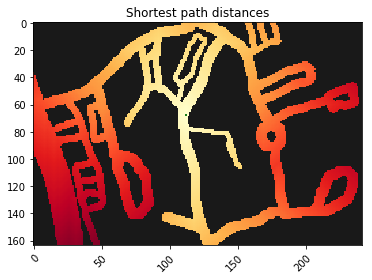

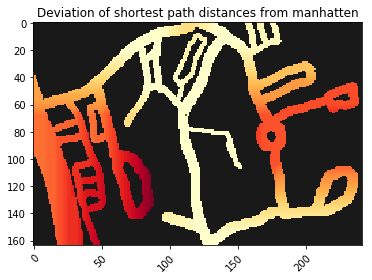

In [13]:
print(shortest_path_data.shape)

def plot_image(data, title, labeling_data):
    fig, ax = plt.subplots()
    im = ax.imshow(data)

    data_height = data.shape[0]
    data_width = data.shape[1]

    # We want to show all ticks...
    #ax.set_xticks(np.arange(data_width))
    #ax.set_yticks(np.arange(data_height))
    # ... and label them with the respective list entries


    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    for i in range(data_height):
        for j in range(data_width):
            #text = ax.text(j, i, labeling_data[i][j], ha="center", va="center", color="w")
            break

    ax.set_title(title)

    fig.tight_layout()
    plt.show()

plot_image(shortest_path_data, "Shortest path distances", distance_board)
plot_image(deviation_data, "Deviation of shortest path distances from manhatten", deviation_board)